### DATA ANALYTICS & PREDICTIVE MODELING OF SUMMER OLYMPIC MEDALS (1976-2008) 

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load & Inspect dataset

In [2]:
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
df.isnull().sum()
df.duplicated().sum()

np.int64(1)

In [4]:
df.drop_duplicates(inplace=True)
df.columns=df.columns.str.strip()

In [5]:
display(df.describe(include='all'))
print("\n Summary Statistics")

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15315,15315.000000,15315,15315,15315,15315,15315,15315,15315,15315,15315
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,816,16,9387,1992,1992,8816,5258
mean,NaN,1993.621678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Summary Statistics


### Data Cleaning & Processing

In [6]:
df['Year']=df['Year'].astype(int)
df['Medal_Score']=df['Medal'].map({'Gold':3, 'Silver':2, 'Bronze':1})
display(df.head())

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Medal_Score
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,3
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1


### Exploaratory Data Analysis

#### Medal Trends Over Time

In [7]:
medals_per_year=df['Year'].value_counts().sort_index(); medals_per_year

Year
1976    1305
1980    1386
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_8096\2977628583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_per_year.index, y=medals_per_year.values, palette="viridis")


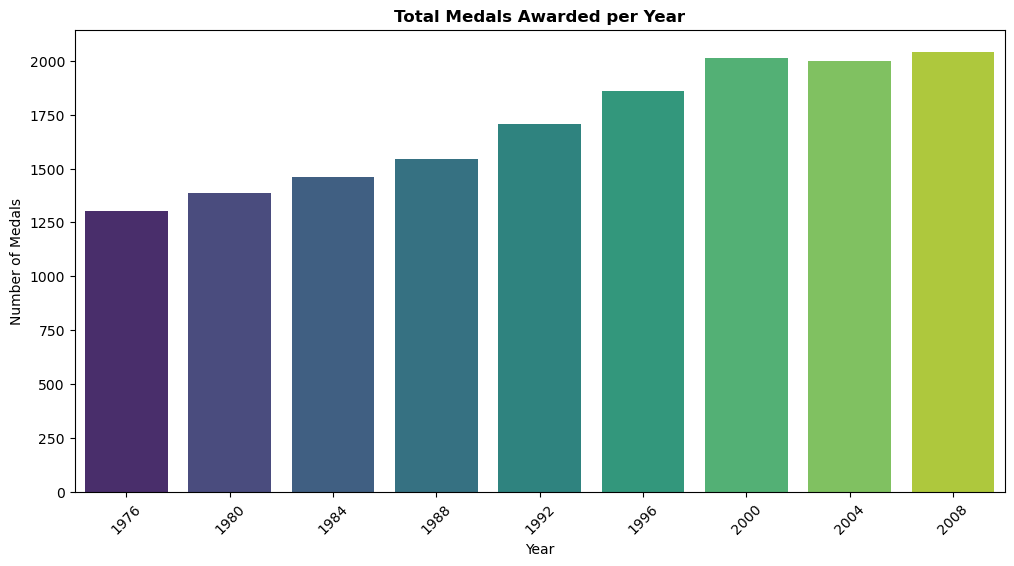

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(x=medals_per_year.index, y=medals_per_year.values, palette="viridis")
plt.title("Total Medals Awarded per Year", weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.savefig("medals_per_year_by_category.png", dpi=300, bbox_inches='tight')
plt.show()

#### Distribution of Medal types over Years

In [9]:
medal_dist=df.groupby(['Year', 'Medal']).size().reset_index(name='Count');
print(medal_dist.head())

   Year   Medal  Count
0  1976  Bronze    447
1  1976    Gold    429
2  1976  Silver    429
3  1980  Bronze    472
4  1980    Gold    459


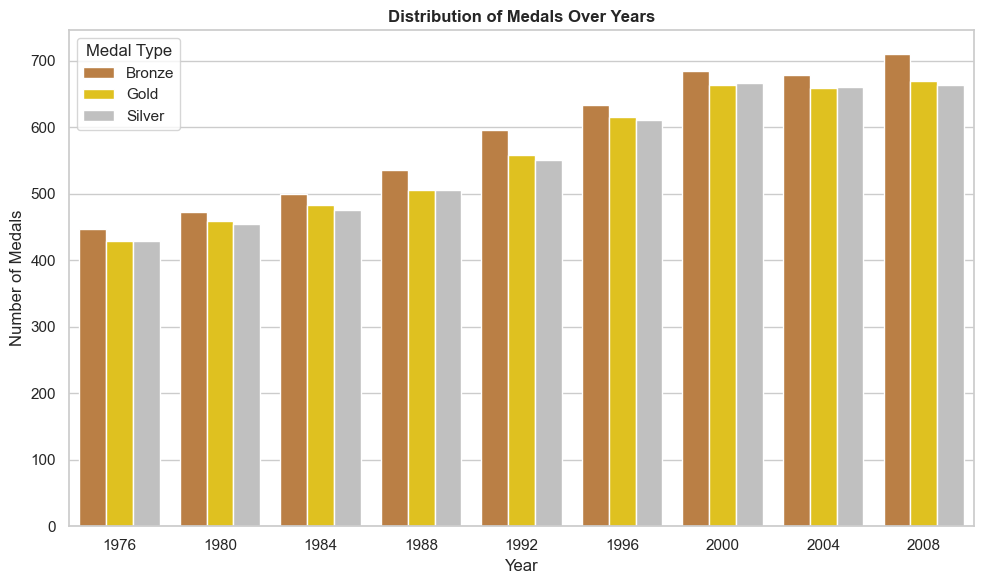

In [10]:
sns.set(style="whitegrid")
medal_colors = {
    'Gold': 'gold',
    'Silver': 'silver',
    'Bronze': '#cd7f32'
}
plt.figure(figsize=(10,6))
sns.barplot(data=medal_dist, x='Year', y='Count', hue='Medal', palette=medal_colors)
plt.title("Distribution of Medals Over Years", weight='bold')
plt.xlabel("Year")
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.tight_layout()
plt.savefig("Medals_distribution_over_years.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
top_countries=df['Country'].value_counts().head(10); top_countries

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_8096\3910255666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


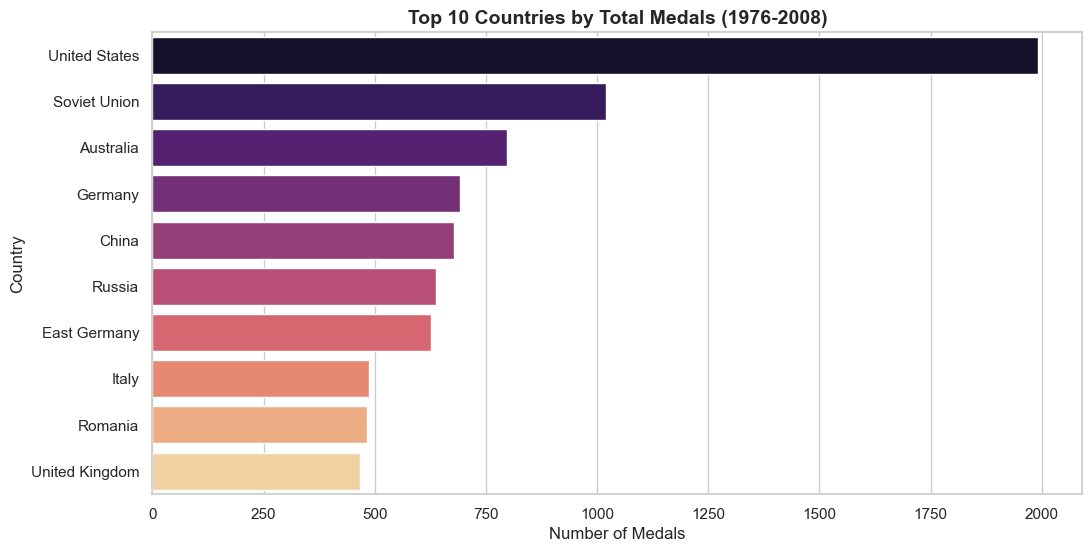

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries by Total Medals (1976-2008)", fontsize=14, weight='bold')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.savefig("top_countries_by_medals.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
country_sport=df.groupby(['Country','Sport'])['Medal'].count().reset_index();
country_sport

,Country,Sport,Medal
0,Afghanistan,Taekwondo,1
1,Algeria,Athletics,6
2,Algeria,Boxing,6
3,Algeria,Judo,2
4,Argentina,Aquatics,1
...,...,...,...
823,Yugoslavia,Wrestling,9
824,Zambia,Athletics,1
825,Zambia,Boxing,1
826,Zimbabwe,Aquatics,7


In [14]:
country_sport_pivot=country_sport.pivot(index='Sport', columns='Country', values='Medal').fillna(0)
country_sport_pivot

Country,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Barbados,Belarus,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands*,West Germany,Yugoslavia,Zambia,Zimbabwe
Sport,,,,,,,,,,,,,,,,,,,,,
Aquatics,0.0,0.0,1.0,0.0,239.0,3.0,0.0,0.0,0.0,0.0,...,578.0,0.0,0.0,1.0,0.0,0.0,44.0,50.0,0.0,7.0
Archery,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Athletics,0.0,6.0,0.0,0.0,24.0,2.0,0.0,19.0,1.0,19.0,...,299.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,1.0,0.0
Badminton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baseball,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basketball,0.0,0.0,24.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,...,192.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0
Boxing,0.0,6.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,2.0,...,42.0,0.0,6.0,4.0,0.0,0.0,3.0,8.0,1.0,0.0
Canoe / Kayak,0.0,0.0,0.0,0.0,31.0,1.0,0.0,0.0,0.0,10.0,...,10.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0
Cycling,0.0,0.0,2.0,0.0,54.0,0.0,0.0,0.0,0.0,1.0,...,32.0,1.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0


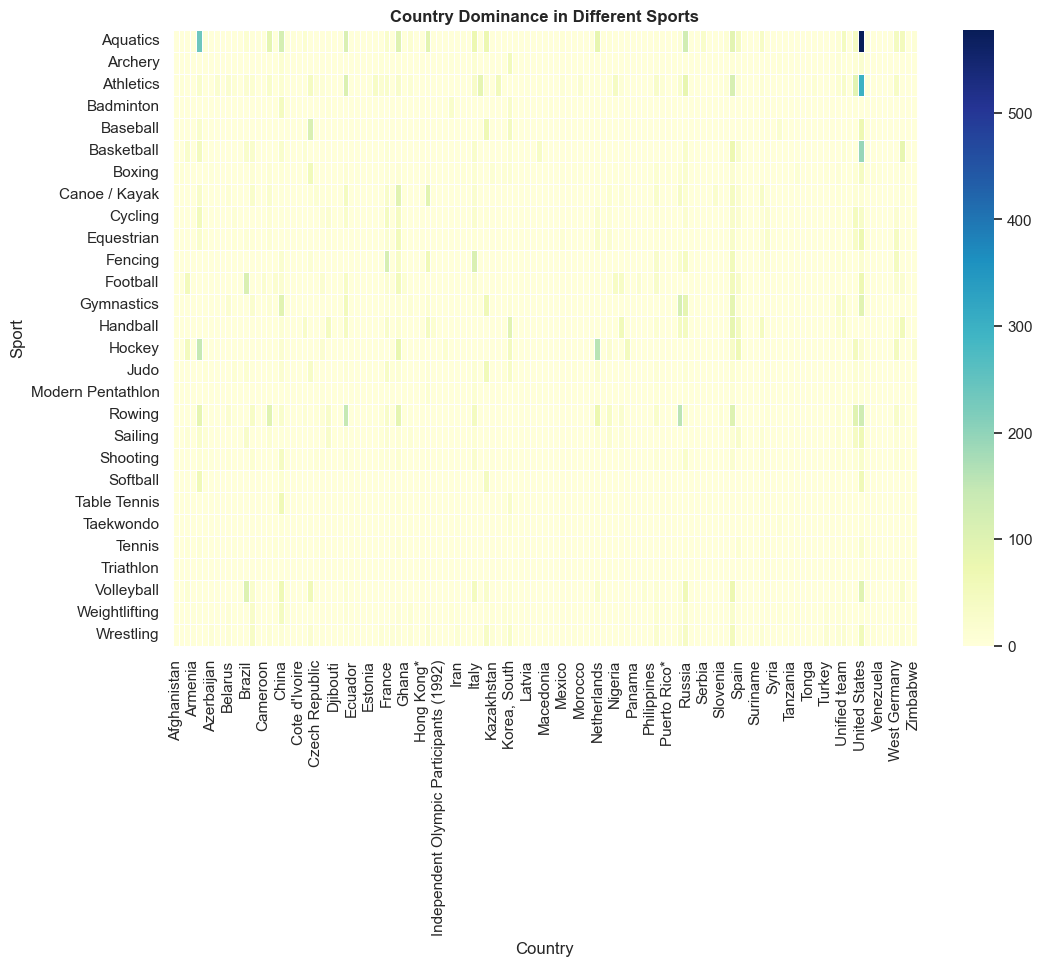

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(country_sport_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title("Country Dominance in Different Sports", weight='bold')
plt.xlabel("Country")
plt.ylabel("Sport")
plt.tight_layout
plt.savefig("country_dominance_sports.png", dpi=300, bbox_inches='tight')
plt.show()

#### Gender Participation Trends

In [16]:
gender_trends=df.groupby(['Year', 'Gender']).size().unstack();
gender_trends.head()

Gender,Men,Women
Year,,
1976,924,381
1980,957,429
1984,973,486
1988,1011,535
1992,1105,600


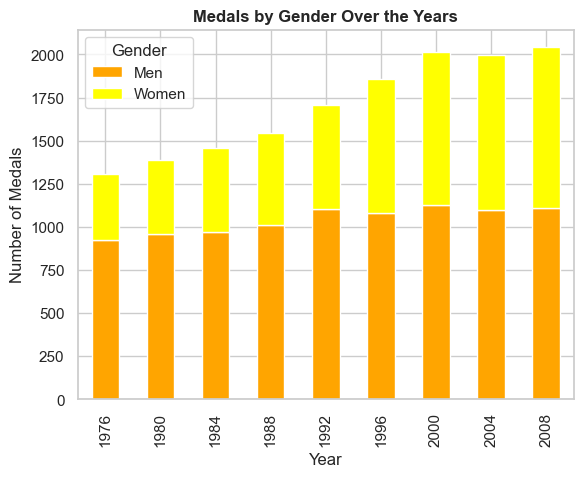

In [17]:
gender_trends.plot(
    kind='bar',
    stacked=True,
    color=['orange', 'yellow'])
plt.title("Medals by Gender Over the Years", weight='bold')
plt.ylabel('Number of Medals')
plt.savefig("medals_by_gender.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
female_df=df[df['Gender'] == 'Women']
female_df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Medal_Score
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1
6,Montreal,1976,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold,3
7,Montreal,1976,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze,1
10,Montreal,1976,Aquatics,Diving,10m platform,"KNAPE-LINDBERGH, Ulrika",Women,SWE,Sweden,W,Silver,2
...,...,...,...,...,...,...,...,...,...,...,...,...
15278,Beijing,2008,Wrestling,Wrestling Free.,55 - 63kg,"KARTASHOVA, Alena",Women,RUS,Russia,W,Silver,2
15281,Beijing,2008,Wrestling,Wrestling Free.,55 - 63kg,"MILLER, Randi",Women,USA,United States,W,Bronze,1
15284,Beijing,2008,Wrestling,Wrestling Free.,48 - 55kg,"RENTERIA, Jackeline",Women,COL,Colombia,W,Bronze,1
15287,Beijing,2008,Wrestling,Wrestling Free.,55 - 63kg,"SHALYGINA, Yelena",Women,KAZ,Kazakhstan,W,Bronze,1


In [19]:
female_count=female_df.groupby('Year')['Athlete'].nunique().reset_index()
female_count

,Year,Athlete
0,1976,328
1,1980,383
2,1984,425
3,1988,446
4,1992,515
5,1996,694
6,2000,800
7,2004,812
8,2008,842
